## Introducción

La empresa Y.Afisha nos piden analizar los datos de las ventas con el objetivo de optimizar las métricas de marketing.

Lo que tienes:

* registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
* un archivo con los pedidos en este periodo;
* estadísticas de gastos de marketing.

Lo que vas a investigar:

* cómo los clientes usan el servicio;
* cuándo empiezan a comprar;
* cuánto dinero aporta cada cliente a la compañía;
* cuándo los ingresos cubren el costo de adquisición de los clientes.

## Importación de datos

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Leer conjunto de datos
visits_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_log_us.csv')
orders_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_log_us.csv')
costs_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/costs_us.csv')

### Diccionario de datos

**visits_df**: La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

* Uid: identificador único del usuario;
* Device: dispositivo del usuario;
* Start Ts: fecha y hora de inicio de la sesión;
* End Ts: fecha y hora de término de la sesión;
* Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Nota: Todas las fechas de esta tabla están en formato AAAA-MM-DD.

**orders_df**: La tabla orders (datos sobre pedidos):

* Uid: identificador único del usuario que realiza un pedido;
* Buy Ts: fecha y hora del pedido;
* Revenue: ingresos de Y.Afisha de este pedido.
* La tabla costs (datos sobre gastos de marketing):

**costs_df**: source_id: identificador de la fuente de anuncios:

* dt: fecha;
* costs: gastos en esta fuente de anuncios en este día.

In [3]:
#Mostrar información del DataFrame
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
#Mostrar información del DataFrame
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
#Mostrar información del DataFrame
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [6]:
#Mostrar información del DataFrame
visits_df.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [7]:
#Mostrar información del DataFrame
orders_df.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
#Mostrar información del DataFrame
costs_df.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Observaciones generales

* Los títulos del primer y segundo datasets no están en el formato correcto, debemos corregirlos a minúsculas.
* Algunos títulos tienen espacios, cambiaremos los espacios por "_".
* A primera instancia no tenemos valores nulos en ningún dataset.
* Tenemos valores que no corresponden a tu tipo de datos, los cambiaremos por el tipo de dato para un mejor manejo.

## Procesamiento de los datos

### Buscar y eliminar valores duplicados

In [9]:
#Buscamos valores duplicados en df_visits
visits_df.duplicated().sum()

0

In [10]:
#Buscamos valores duplicados en df_orders
orders_df.duplicated().sum()

0

In [11]:
#Buscamos valores duplicados en df_costs
costs_df.duplicated().sum()

0

###  Corregir los datos

In [12]:
#crea función para cambiar de mayusculas a minúsculas y cambiar los espacios de " " a "_"
def titulos(df):
    columnas = df.columns
    nombre_columnas = [columna.lower().replace(' ', '_') for columna in columnas]
    df.columns = nombre_columnas

    return df

In [13]:
# Corregir títulos en mayúsulas y los espacios de los datasets
visits_df = titulos(visits_df)
df_orders = titulos(orders_df)
df_costs = titulos(costs_df)

print(visits_df.columns)
print(orders_df.columns)
print(costs_df.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')
Index(['source_id', 'dt', 'costs'], dtype='object')


### Agregar valor a los datasets

In [14]:
#Agregar valores de datos en df_visits
visits_df['end_ts'] = pd.to_datetime(visits_df['end_ts'])
visits_df['source_id'] = visits_df['source_id'].astype('str')
visits_df['start_ts'] = pd.to_datetime(visits_df['start_ts'])
visits_df['uid'] = visits_df['uid'].astype('str')

#verificamos los datos
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  object        
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 13.7+ MB


In [15]:
#Agregar valores de datos en df_orders

orders_df['buy_ts'] = pd.to_datetime(orders_df['buy_ts'])
orders_df['uid'] = orders_df['uid'].astype('str')

#verificamos los datos
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [16]:
#Agregar valores de datos en df_costs

costs_df['source_id'] = costs_df['source_id'].astype('category')
costs_df['dt'] = pd.to_datetime(costs_df['dt'])

#verificamos los datos
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB


### Observaciones generales

En esta sección nos enfocamos en corregir los datasets reemplazando y agredando valores a las columnas. Para ello creamos dos funciones, la primera cambia los nombres de las columnas a minúsculas y la segunda reemplaza los espacios por "_".

También cambiamos los tipos de datos de las columnas que contienen fechas de objetct a datetime o a su valor correspondiente.

## Análisis de negocio

### Métricas de usuario por visitas

**Visitas**

En este apartado nos enfocamos en responder las siguientes preguntas:

* ¿Cuántas personas lo usan cada día, semana y mes?
* ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
* ¿Cuál es la duración de cada sesión?
* ¿Con qué frecuencia los usuarios y las usuarias regresan?

#### Average number of users per day, week and month

In [17]:
#agregar la columna que contiene el año
visits_df['year'] = visits_df['start_ts'].dt.year
#agregar la columna que contiene el mes
visits_df['month'] = visits_df['start_ts'].dt.month
#agregar la columna que contiene la semana
visits_df['week'] = visits_df['start_ts'].dt.isocalendar().week
#agregar la columna que contiene el día
visits_df['date'] = visits_df['start_ts'].dt.date

In [18]:
#Calculamos el promedio de personas por día
dau_total = (
    visits_df.groupby(['date'])
    .agg({'uid':'nunique'}).mean()
)

print(f'El promedio de usuarios por día es: {dau_total.iloc[0]}')

El promedio de usuarios por día es: 907.9917582417582


In [19]:
#Calculamos el promedio de personas por semana
wau_total =  (
    visits_df.groupby(['year', 'week'])
    .agg({'uid':'nunique'}).mean())

print(f'El promedio de usuarios por semana es: {wau_total.iloc[0]}')

El promedio de usuarios por semana es: 5716.245283018868


In [20]:
#Calculamos el promedio de personas por mes
mau_total = (
    visits_df.groupby(['year', 'month'])
    .agg({'uid': 'nunique'}).mean())

print(f'El promedio de usuarios por mes es: {mau_total.iloc[0]}')

El promedio de usuarios por mes es: 23228.416666666668


#### Sessions Per User
¿Cuántas sesiones hay por día?

In [21]:
#Calculamos las sesiones por día
sessions_per_user = (
    visits_df.groupby(['year','date'])
    .agg({'uid':['count', 'nunique']})
)

sessions_per_user.columns = ['n_sessions', 'n_users']

sessions_per_user['sess_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

sessions_per_user.head()

n_sessions  n_users  sess_per_user
year date                                          
2017 2017-06-01         664      605       1.097521
     2017-06-02         658      608       1.082237
     2017-06-03         477      445       1.071910
     2017-06-04         510      476       1.071429
     2017-06-05         893      820       1.089024

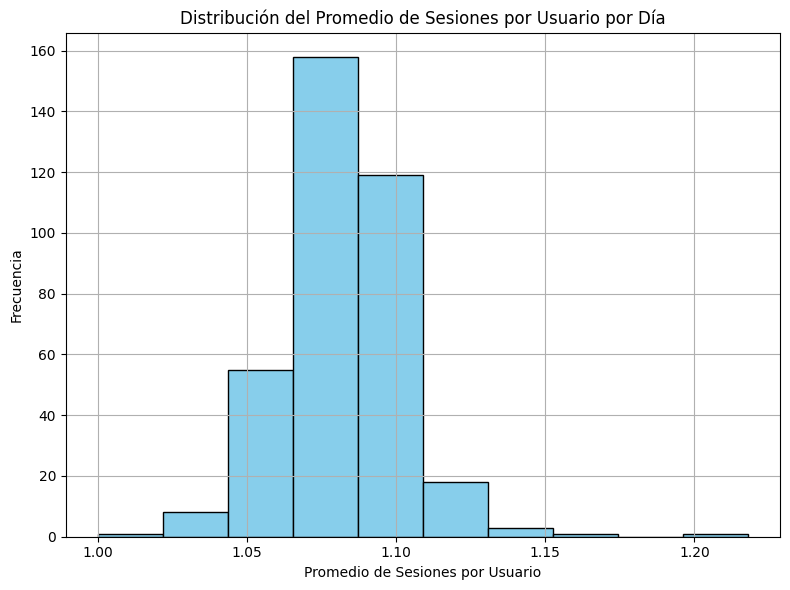

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el histograma del promedio de sesiones por usuario por día
ax.hist(sessions_per_user['sess_per_user'], bins=10, color='skyblue', edgecolor='black')

# Configurar el título y las etiquetas de los ejes
ax.set_title('Distribución del Promedio de Sesiones por Usuario por Día')
ax.set_xlabel('Promedio de Sesiones por Usuario')
ax.set_ylabel('Frecuencia')

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

**Observaciones**

El historigrama muestra tendencia central, los usuarios realizan entre 1.05 y 1.10 sesiones por día, no obtuvimos valores atípicos por lo que nos indica que el comportamiento es bastante consistente.

####  ASL (Average session length)

¿Cuál es la duración  de cada sesión?

In [23]:
visits_df['session_duration_sec'] = (visits_df['end_ts'] - visits_df['start_ts']).dt.seconds

# Calculamos la media de duración de las sesiones
mean_duration = visits_df['session_duration_sec'].mean()
print(f"Duración media de las sesiones: {mean_duration} segundos ({mean_duration / 60:.2f} minutos)")

Duración media de las sesiones: 643.506488592098 segundos (10.73 minutos)


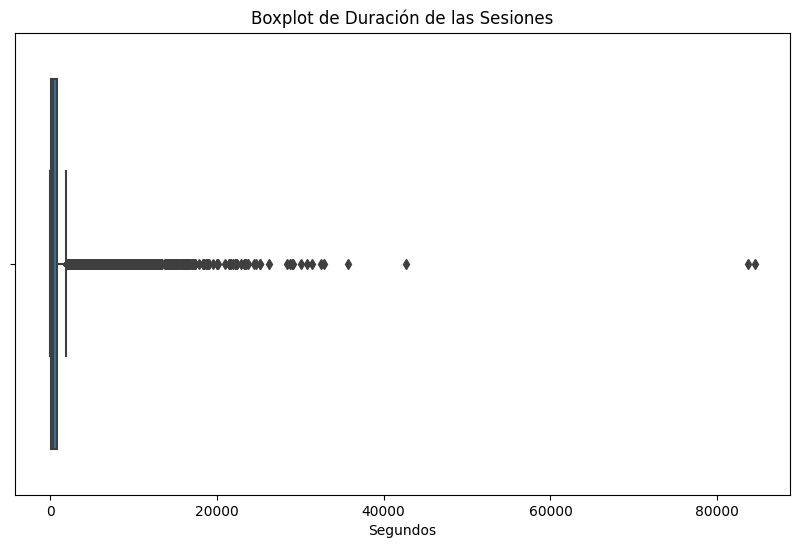

In [24]:
# Crear un boxplot para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(visits_df['session_duration_sec'])
plt.title('Boxplot de Duración de las Sesiones')
plt.xlabel('Segundos')
plt.show()

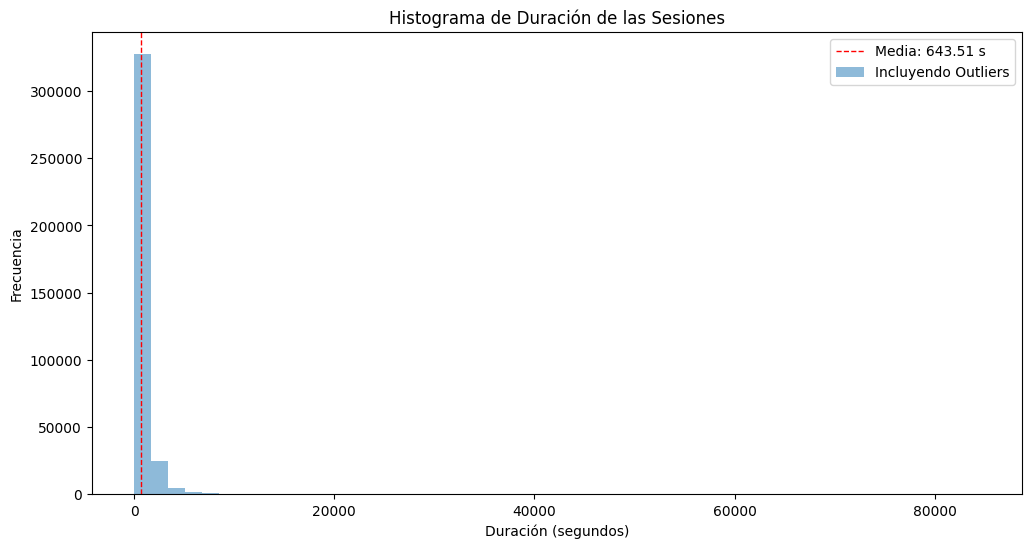

In [25]:
# Histograma de la duración de las sesiones
plt.figure(figsize=(12, 6))
plt.hist(visits_df['session_duration_sec'], bins=50, alpha=0.5, label='Incluyendo Outliers')
plt.title('Histograma de Duración de las Sesiones')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.axvline(mean_duration, color='r', linestyle='dashed', linewidth=1, label=f'Media: {mean_duration:.2f} s')
plt.legend()
plt.show()

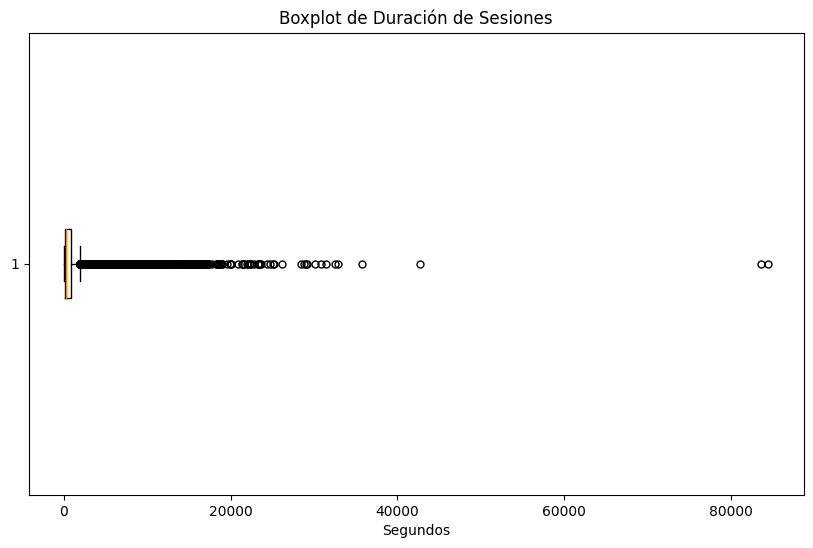

In [26]:
#boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(visits_df['session_duration_sec'], vert=False, flierprops=dict(marker='o', color='red', markersize=5))
plt.title('Boxplot de Duración de Sesiones')
plt.xlabel('Segundos')
plt.show()

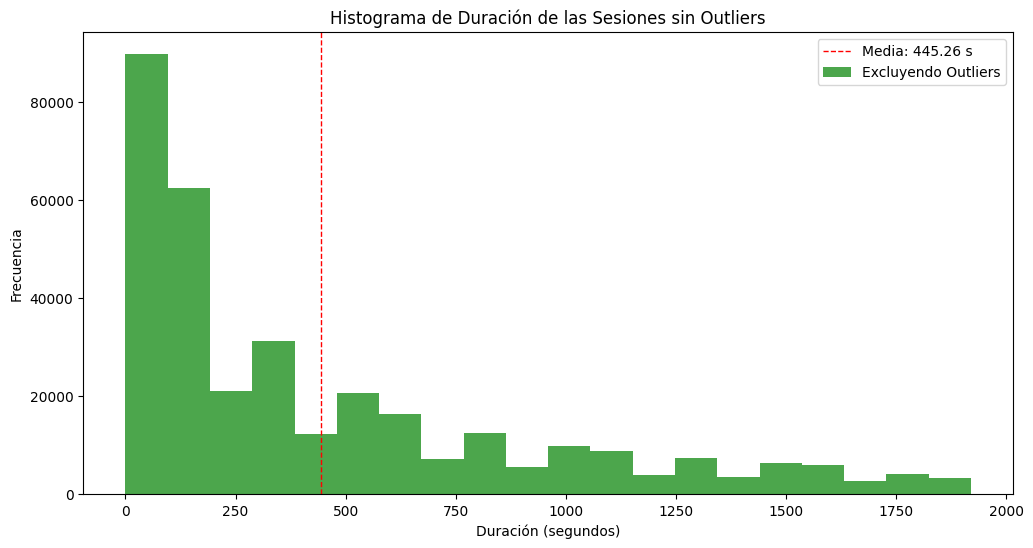

In [27]:
# Identificar y excluir outliers para un segundo histograma
Q1 = visits_df['session_duration_sec'].quantile(0.25)
Q3 = visits_df['session_duration_sec'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

filtered_visits = visits_df[visits_df['session_duration_sec'] <= outlier_threshold]

plt.figure(figsize=(12, 6))
plt.hist(filtered_visits['session_duration_sec'], bins=20, alpha=0.7, color='green', label='Excluyendo Outliers')
plt.title('Histograma de Duración de las Sesiones sin Outliers')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.axvline(filtered_visits['session_duration_sec'].mean(), color='r', linestyle='dashed', linewidth=1, label=f"Media: {filtered_visits['session_duration_sec'].mean():.2f} s")

plt.legend()
plt.show()

**Observaciones**:

El primer historigrama no nos permite tener una visión clara de como se distribuye el comportamiento de la duración de la sesión de los usuarios, vemos que la media es de al rededor de 10.5 pero no podemos ver los valores atípicos.

En el boxplot podemos visualizar que tenemos dos usuarios con sesiones de hasta 8000 segundos, estos usuarios sesgan por completo nuestra primera gráfica por lo que no los tomaremos en cuenta en la segunda.

El análisis del segundo histograma nos muestra que, tras la exclusión de outliers, la duración típica de las sesiones es bastante corta, y tenemos una distribución a la derecha, lo que indica una asimetría positiva.


La media considerando únicamente los datos que obtuvimos del IQR es 7.41 

Sugerencia del análisis: Esta información nos proporciona información valiosa a considerar para diseñar estrategias de engagement y optimización de la experiencia de usuario.

Opinión: Es probable que los usuarios que se quedan en los primeros 200 segundos (3 min), son los usuarios que no realizaron compra. Mientras que los usuarios que se quedaron al rededor de los 7.41 min, tuvieron más tiempo para realizar una compra.

#### Sticky Factor (factor de adherencia)

En este apartado nos enfocamos en análizar con qué frecuencia los usuarios y usuarias regresan. Para responder esta pregunta utilizamos el sticky factor para medir la lealtad de los usuarios, es decir, con cuanta frecuencia regresan.

In [28]:
#Sticky factor semanal

sticky_wau = dau_total/wau_total * 100

print(f'El factor de adherencia por semana es de: {sticky_wau.iloc[0]}')
sticky_wau

El factor de adherencia por semana es de: 15.88440861589881


uid    15.884409
dtype: float64

In [29]:
#Sticky factor mensual

sticky_mau = dau_total/mau_total * 100
print(f'El factor de adherencia por mes es de : {sticky_mau.iloc[0]}')
sticky_mau

El factor de adherencia por mes es de : 3.908969652437603


uid    3.90897
dtype: float64

In [30]:
visits_df

,device,end_ts,source_id,start_ts,uid,year,month,week,date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19


In [31]:
# Crear una copia independiente del DataFrame visits_df
new_visits_df = visits_df.copy(deep=True)


first_activity_date = new_visits_df.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'

user_activity = new_visits_df.join(first_activity_date, on='uid')

user_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   device                359400 non-null  object        
 1   end_ts                359400 non-null  datetime64[ns]
 2   source_id             359400 non-null  object        
 3   start_ts              359400 non-null  datetime64[ns]
 4   uid                   359400 non-null  object        
 5   year                  359400 non-null  int64         
 6   month                 359400 non-null  int64         
 7   week                  359400 non-null  int64         
 8   date                  359400 non-null  object        
 9   session_duration_sec  359400 non-null  int64         
 10  first_activity_date   359400 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(4), object(4)
memory usage: 30.2+ MB


In [32]:
new_visits_df

,device,end_ts,source_id,start_ts,uid,year,month,week,date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19


In [61]:
first_activity_date

uid
10000171586432207426   2017-12-01 15:11:00
10000344846682484395   2018-02-21 16:01:00
1000036778515242839    2017-09-05 20:22:00
10000460875579931334   2017-09-13 09:12:00
10000558740593440652   2018-01-03 18:39:00
                               ...        
9999530179466660745    2017-06-14 14:33:00
9999704916412649026    2017-06-29 23:04:00
9999829453910784044    2017-11-09 15:32:00
9999912853550499774    2017-08-18 09:23:00
9999996800317156310    2017-11-24 17:22:00
Name: first_activity_date, Length: 228169, dtype: datetime64[ns]

In [33]:
user_activity

,device,end_ts,source_id,start_ts,uid,year,month,week,date,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19,2017-07-29 19:07:00
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19,2018-01-25 17:38:00
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19,2018-03-03 10:12:00
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19,2017-11-02 10:12:00


<AxesSubplot:title={'center':'Cohortes: retención de usuarios/as'}, xlabel='cohort_lifetime', ylabel='first_activity_month'>

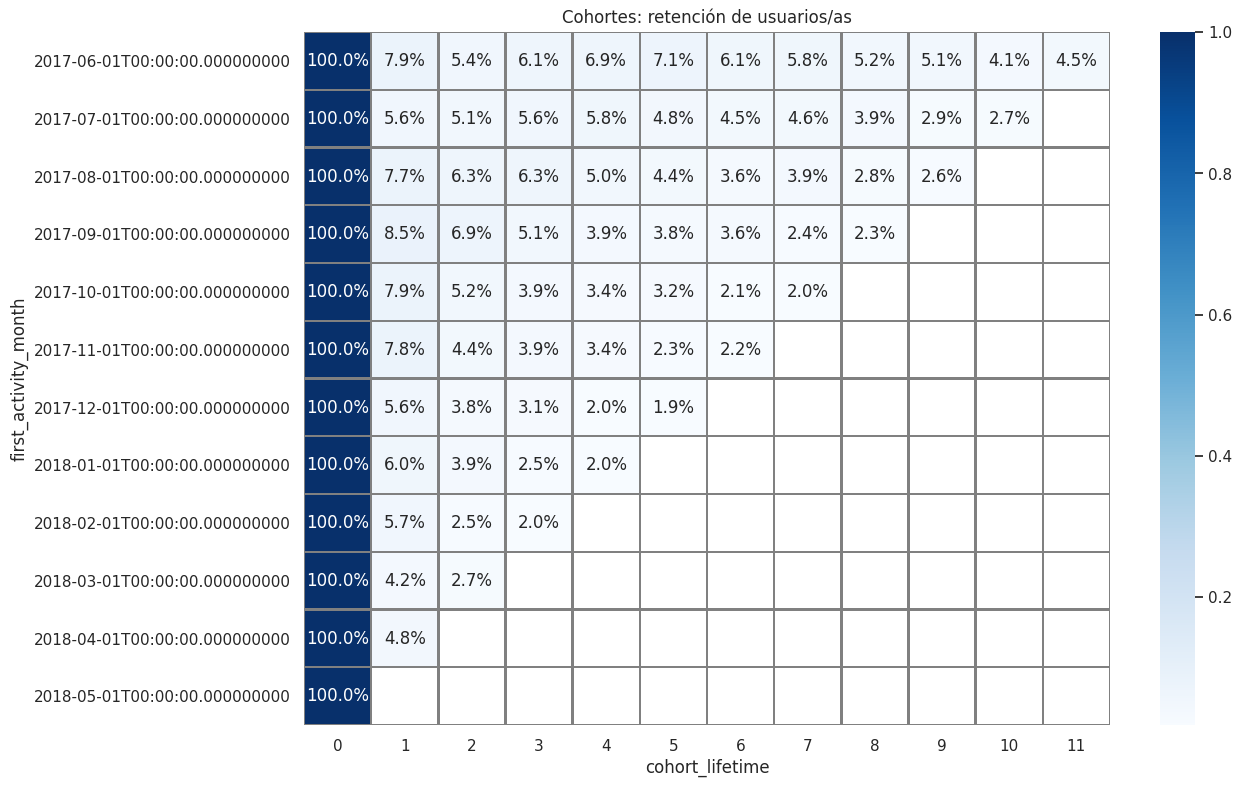

In [34]:
# Asignar el primer día del mes a 'activity_month'
user_activity['activity_month'] = user_activity['start_ts'].dt.to_period('M').dt.to_timestamp()

# Asignar el primer día del mes a 'first_activity_month'
user_activity['first_activity_month'] = user_activity['first_activity_date'].dt.to_period('M').dt.to_timestamp()

# Calcular la diferencia en meses para 'cohort_lifetime'
user_activity['cohort_lifetime'] = (
    (user_activity['activity_month'].dt.year - user_activity['first_activity_month'].dt.year) * 12 +
    (user_activity['activity_month'].dt.month - user_activity['first_activity_month'].dt.month)
)

# Agrupar por mes de primera actividad y por vida de cohorte, y contar usuarios únicos
cohorts = (
    user_activity.groupby(['first_activity_month', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
)

# Obtener el conteo inicial de usuarios para la semana 0 de cada cohorte
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

# Unir con el conteo inicial de usuarios para calcular la retención
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# Crear tabla pivote para mostrar la retención por cada mes de vida de la cohorte
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)

#print(retention_pivot)
#cmap = sns.color_palette("light:b", as_cmap=True)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: retención de usuarios/as')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap ='Blues')

### Observaciones generales

La actividad de los usuarios puede fluctuar a lo largo del tiempo. Pueden haber picos de actividad en ciertos días o semanas debido a factores como promociones, eventos especiales o cambios estacionales. Estos picos pueden aumentar temporalmente el factor de adherencia semanal, pero no necesariamente se mantendrán durante todo el mes.

En resumen, el factor de adherencia por mes tiende a ser menor que el de la semana debido a la disminución de la frecuencia de uso, la variabilidad en la actividad de los usuarios y otros factores relacionados con el comportamiento humano y el ciclo de vida de un producto.

### Ventas

RESPONDE PARA VENTAS:

* ¿Cuándo la gente empieza a comprar?
* ¿Cuántos pedidos hacen durante un período de tiempo dado?
* ¿Cuál es el tamaño promedio de compra?
* ¿Cuánto dinero traen? (LTV)

#### Conversiones por día

En este apartado calculamos cuanto tiempo transcurre desde la primera sesión hasta que realizan la primera compra.

In [35]:
# Para cada usuario, obtenemos la fecha de la primera sesión
first_activity_date = visits_df.groupby('uid')['start_ts'].min()
first_activity_date.name = 'first_activity_date'

# Para cada usuario, obtenemos la fecha de la primera compra
first_order = orders_df.groupby('uid')['buy_ts'].min()
first_order.name = 'first_order'

#Realizamos la unión
visits_df = visits_df.join(first_activity_date, on='uid')
orders_df = orders_df.join(first_order, on='uid')

merged_df = pd.merge(visits_df, orders_df, on='uid', how='inner')

merged_df['time_to_event'] = (merged_df['first_order'] - merged_df['first_activity_date'])

display(merged_df.head())

,device,end_ts,source_id,start_ts,uid,year,month,week,date,session_duration_sec,first_activity_date,buy_ts,revenue,first_order,time_to_event
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,0 days 00:20:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,0 days 00:20:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,0 days 15:11:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,0 days 15:11:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,0 days 15:11:00


In [36]:
#Revisamos la información estadística
merged_df['time_to_event'].describe()

count                        761807
mean     17 days 15:37:02.129909544
std      42 days 08:51:00.569695410
min                 0 days 00:00:00
25%                 0 days 00:17:00
50%                 1 days 23:49:00
75%                 8 days 21:07:00
max               363 days 07:04:00
Name: time_to_event, dtype: object

In [37]:
##Cambiamos el formato a días
merged_df['time_to_event'] = merged_df['time_to_event'].dt.days

In [38]:
merged_df["time_to_event"].unique()

array([  0,  20,   2,   3,  24, 171, 120,  19,  55, 111, 105,  61,  73,
         1,   4,  56,   5,  69,  60,  25,   8,  63, 255, 175,   6, 185,
        31, 234,  92,  35,  42, 179,  38, 156, 118,  40,  43,  26,  27,
        76, 107,  22, 327,  72,  15,  14,  89,  30,  74,  51, 172, 190,
       173, 226, 273,  18,  21,  64,  96, 149,  70,  33,  90,  98,  28,
       142, 165, 266,  13, 101, 200, 182, 247, 167, 183,   7, 225,  11,
       152,  97, 138,  53,  85, 328, 285,  36,  78, 164,  83,  39, 162,
       119, 139,  57,  67,  95,  34,  12,  29, 153,   9, 108,  50,  77,
       117, 203, 188,  41, 113,  52,  71, 134,  94,  91, 104, 112, 122,
       150, 259, 219, 176, 202,  16,  75, 145, 114,  44,  66,  48, 168,
       155,  17,  62,  93, 270, 136, 124, 125,  45, 131,  37, 199, 132,
       195,  23, 137, 157, 237, 209,  79, 233, 148, 174,  49, 123,  10,
       146, 292, 348, 221,  59, 316, 214,  32, 100,  99, 135, 227, 194,
       147, 207, 264, 191, 133,  84, 235, 116, 121, 254, 189,  8

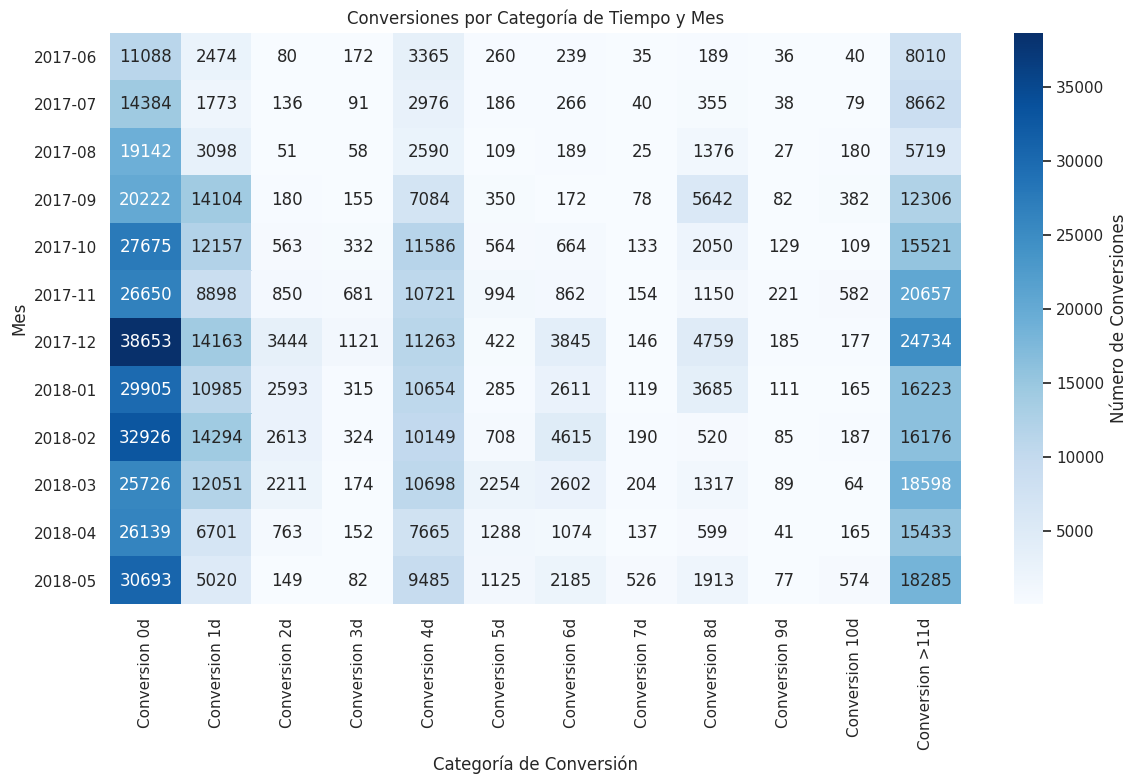

In [39]:
# Creamos una columna para categorizar la conversión
merged_df['conversion_category'] = pd.cut(merged_df['time_to_event'], bins=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')], labels=['Conversion 0d', 'Conversion 1d', 'Conversion 2d', 'Conversion 3d', 'Conversion 4d', 'Conversion 5d', 'Conversion 6d', 'Conversion 7d', 'Conversion 8d', 'Conversion 9d', 'Conversion 10d', 'Conversion >11d'])

# Agregamos una columna para el mes en formato YYYY-MM para facilitar el filtrado
merged_df['year_month'] = merged_df['year'].astype(str) + '-' + merged_df['month'].astype(str).str.zfill(2)

# Creamos un DataFrame con todos los meses en el rango deseado
all_months = pd.date_range(start='2017-06-01', end='2018-05-01', freq='MS').strftime('%Y-%m')

# Convertimos la lista de todos los meses en un DataFrame
all_months_df = pd.DataFrame(all_months, columns=['year_month'])

# Merge para obtener todos los meses en merged_df
merged_df = all_months_df.merge(merged_df, how='left', on='year_month')

# Agrupamos por mes y categoría de conversión
conversiones_por_mes = merged_df.groupby(['year_month', 'conversion_category']).size().unstack(fill_value=0)

# Creamos el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conversiones_por_mes, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Número de Conversiones'})
plt.title('Conversiones por Categoría de Tiempo y Mes')
plt.xlabel('Categoría de Conversión')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

**Comentarios:**

Diciembre del 2018 ('2018-12') fue el cohorte que más conversiones generó para la categoría de 0d.

La mayor parte de las conversiones son de los clientes que realizan su primera compra el mismo día que visitaron la página por primera vez. También podemos ver que muchos clientes tienden a volver al día de haber realizado su primera sesión.

Existe un claro aumento en la cantidad de conversiones hacia el final del año, especialmente en diciembre de 2017 ('2017-12'). Esto podría deberse a un comportamiento estacional, como las compras navideñas.

Hay un número significativo de conversiones que suceden después de 1 a 3 días ('Conversión 1d' a 'Conversión 3d'), lo que podría sugerir una ventana efectiva de retargeting o seguimiento de los usuarios después de la primera sesión.

Las conversiones de '0d' a '3d' tienden a ser las más altas, disminuyendo notablemente para categorías de tiempo más extenso.

#### Pedidos durante un periodo dado

In [40]:
#Creamos un cohort
orders_df['first_order_month'] = orders_df['first_order'].astype('datetime64[M]')

orders_df['order_month'] = orders_df['buy_ts'].astype('datetime64[M]')

orders_grouped_by_cohorts = orders_df.groupby(['first_order_month', 'order_month']).agg({'buy_ts':'nunique', 'uid':'nunique'})

orders_grouped_by_cohorts['orders_per_user'] = orders_grouped_by_cohorts['buy_ts']/orders_grouped_by_cohorts['uid']

orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()

orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']

orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime']/ np.timedelta64(1, 'M')

orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')

lifetime_orders_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='orders_per_user',
    aggfunc='mean',
)

display(lifetime_orders_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.109738,2.885246,3.480000,4.129630,3.318182,3.238806,4.435484,3.702128,3.655172,3.377778,2.133333,1.622642
2017-07-01,1.079563,1.923077,2.105263,1.609375,1.469388,2.157895,1.666667,1.256410,1.380952,1.090909,2.038462,NaN
2017-08-01,1.081022,1.844828,1.886792,1.818182,2.100000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN,NaN
2017-09-01,1.079427,1.684615,1.600000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN,NaN,NaN
2017-10-01,1.044470,1.519417,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN,NaN,NaN,NaN
2017-11-01,1.049743,1.756757,1.500000,1.981132,1.679012,1.229167,1.645161,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.059092,1.842466,1.961165,1.845361,1.720000,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.051290,1.947368,1.915663,1.488372,1.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.032320,1.872881,1.431034,1.794872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Tamaño promedio de pedidos del cliente'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

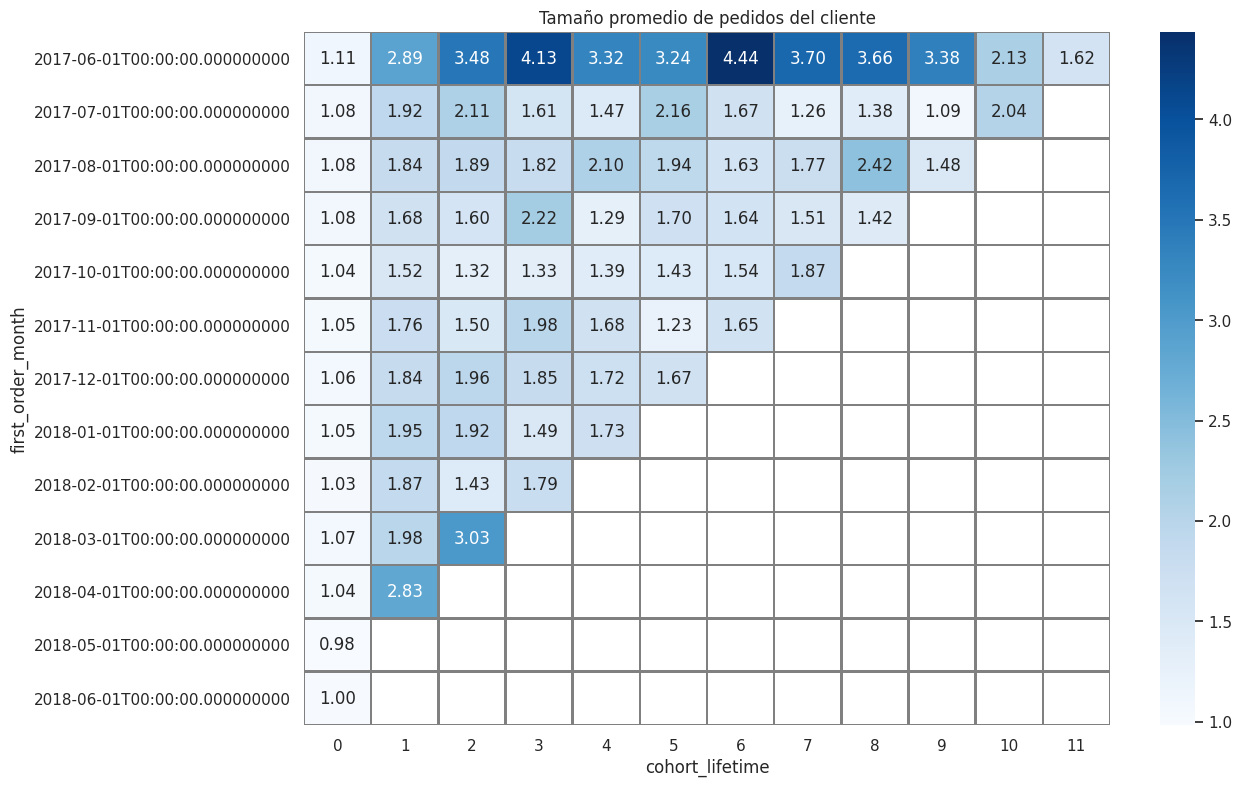

In [41]:
#Creamos un mapa de calor
plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de pedidos del cliente')
sns.heatmap(
    lifetime_orders_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
    cmap = 'Blues'
)

**Comentarios**:
* Los clienetes que realizaron su primera compra en junio del 2017 han sido los clientes que más han aumentado su promedio de pedidos conforme pasan los meses de ciclo de vida.
*  Los clientes en promedio realizan un pedido en su primer mes de compra y conforme avanzan los meses podemos ver un aumento gradual de pedidos por cliente, esto nos indica que hay un seguimiento por parte de los usuarios aún después de su primera compra.

#### Tamaño promedio de compra

En este apartado realizamos un cohorte que muestre el tamaño promedio de compra por cliente a partir de su primera compra y su comportamiento através de los meses.

In [42]:
#Creamos un cohort para los ingresos por usuario en un mes dado
orders_revenue_cohort = orders_df.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum', 'uid':'nunique'})

#Calculamos el ingreso por usuario
orders_revenue_cohort['revenue_per_user'] = orders_revenue_cohort['revenue']/orders_revenue_cohort['uid'] 

orders_revenue_cohort = orders_revenue_cohort.reset_index()

orders_revenue_cohort['cohort_lifetime'] = orders_revenue_cohort['order_month'] - orders_revenue_cohort['first_order_month']

orders_revenue_cohort['cohort_lifetime'] = orders_revenue_cohort['cohort_lifetime']/ np.timedelta64(1, 'M')

orders_revenue_cohort['cohort_lifetime'] = orders_revenue_cohort['cohort_lifetime'].round().astype('int')

orders_revenue_cohort['first_order_month'].dt.strftime('%Y-%m')

#creamos una tabla dinámica
lifetime_revenue_pivot = orders_revenue_cohort.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean',)

display(lifetime_revenue_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Tamaño promedio de compra por cliente'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

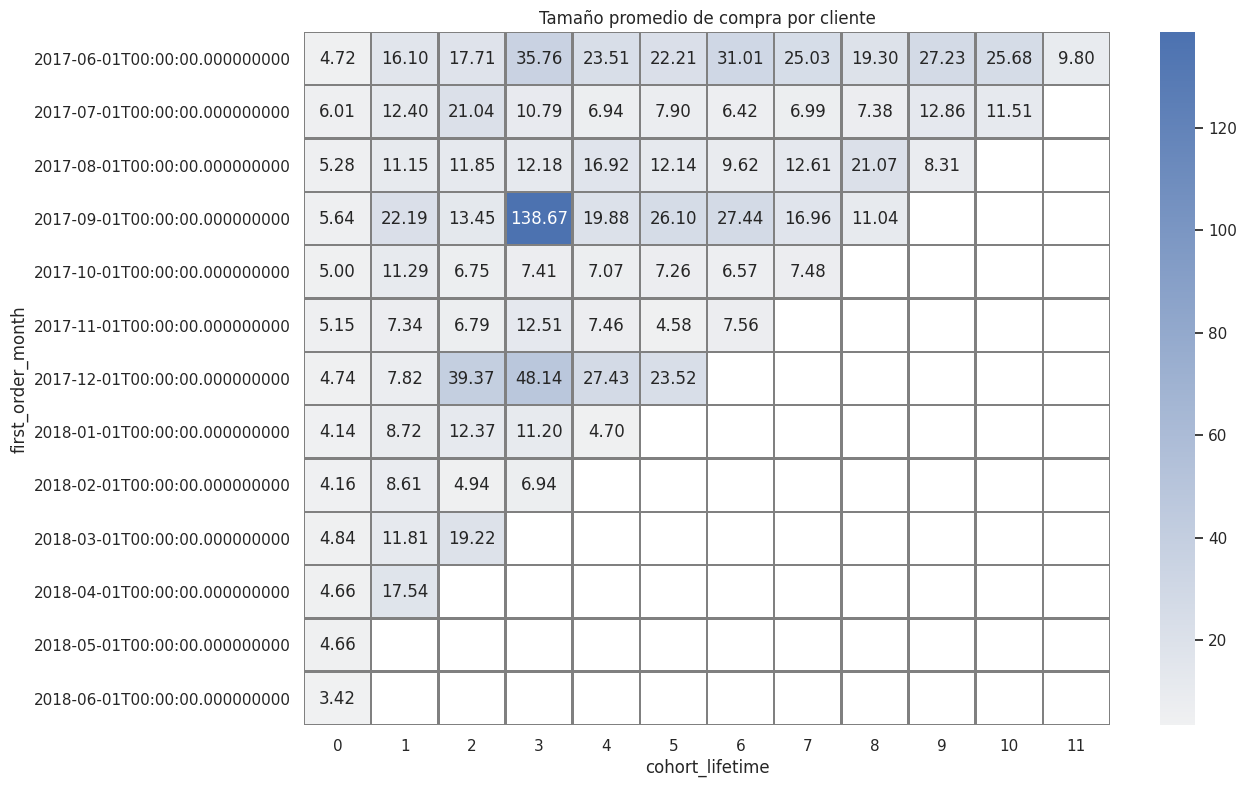

In [43]:
#creamos un mapa de calor
cmap = sns.color_palette("light:b", as_cmap=True)

plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra por cliente')
sns.heatmap(
    lifetime_revenue_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
    cmap=cmap
)

**Comentarios**:
    
* Los usuarios que realizaron su primera compra en junio del 2017 fueron aumentando su promedio de compra cada mes hasta el mes 11 de su ciclo de vida, en el 12 hubo una baja considerable.

* Los usuarios que realizaron su primera compra en septiembre del 2017, en el 4to mes de ciclo de vida aumentaron su promedio de compra hasta 138.67 por persona. Es importante analizar que evento ocurrió en ese periodo.  Esto sugiere que el pico fue un evento aislado o temporal en lugar de un cambio a largo plazo en el comportamiento del cliente.

* Los usurios que realizaron su primera compra en diciembre del 2017 aumentaron bastante su promedio de compra a partir del 3er mes de ciclo de vida.

#### ¿Cuánto dinero traen? (LTV)

In [44]:
#Calculamos el número de nuevos clientes para cada mes:
cohort_sizes = orders_df.groupby(['first_order_month']).agg({'uid':'nunique'}).reset_index()
#renombramos la columna
cohort_sizes.columns = ['first_order_month', 'n_buyers']

#creamos el cohorte
#agrupamos las órdenes por primera compra y mes de la compra y totalizamos los ingresos 
cohort = orders_df.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()
#cada fila especifica los ingresos que generó la cohorte
cohort.head()

#unimos los data frames por la columna first_order_month
report = pd.merge(cohort_sizes, cohort, on='first_order_month')

report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


<AxesSubplot:title={'center':'LTV'}, xlabel='age', ylabel='first_order_month'>

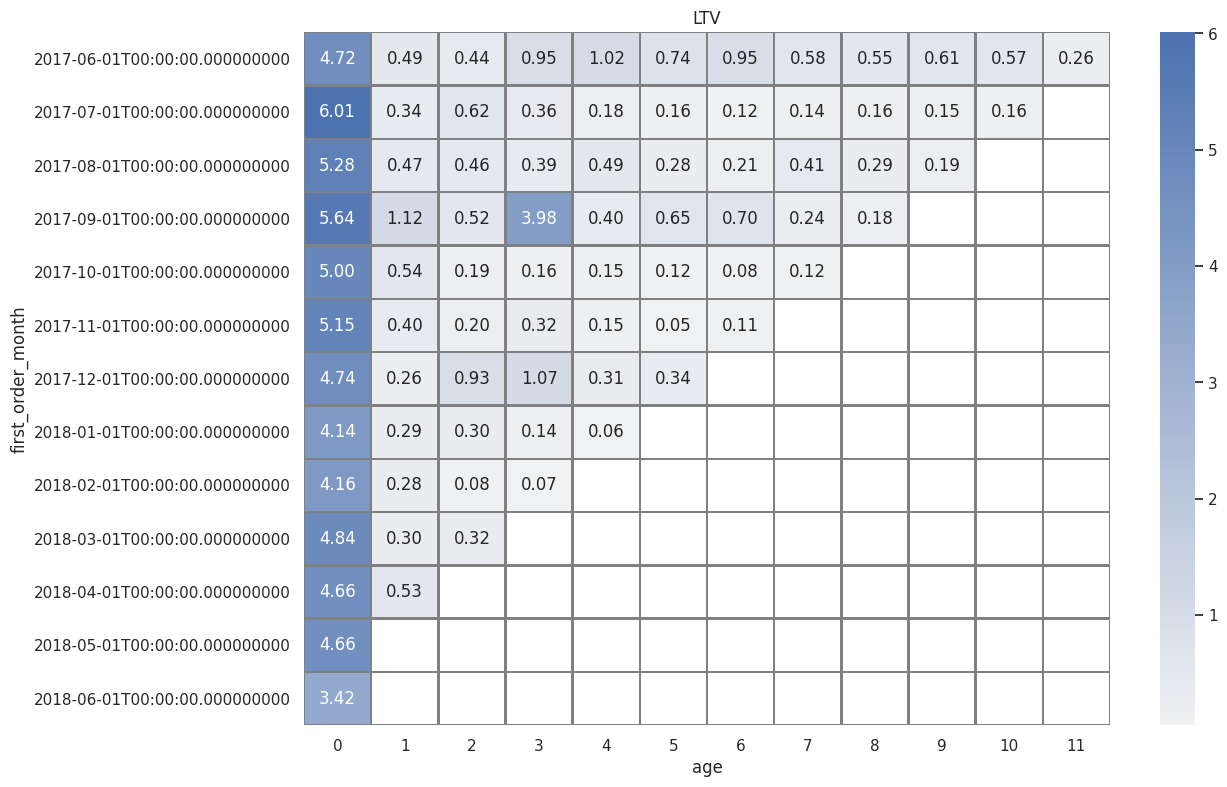

In [45]:
#calculamos el LVT
#el LTV se calcula sobre la base del beneficio bruto en lugar de los ingresos, pero no lo tenemos así que utilizamos los ingresos.
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['revenue'] / report['n_buyers']

display(report.head())

#creamos un mapa de calor
output_lvt = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)
#.round()

output_lvt.fillna('')

cmap = sns.color_palette("light:b", as_cmap=True)
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap( 
    output_lvt,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
    cmap=cmap
)

In [46]:
output_lvt.cumsum(axis=1).mean(axis=0)

age
0      4.801682
1      5.395666
2      5.821811
3      6.689763
4      7.298634
5      7.969053
6      8.387686
7      9.083583
8     10.062084
9      9.251340
10    10.004616
11    11.879234
dtype: float64

**Comentarios:**

**Cohortes específicas**: la de 2017-09, muestran un pico significativo en LTV en el tercer mes. Estos picos pueden indicar eventos de éxito específicos, como campañas de marketing efectivas o períodos de alta demanda que podrían replicarse o estudiarse más a fondo.

### Observaciones generales de las métricas de Ventas

* Se sugiere estudiar las estrategias de marketing implementadas para los clientes que realizaron su primera compra en sept del 2019 ya que fueron particularmente valiosos y se destacaron en las métricas de ventas.


### Marketing:


En el siguiente apartado buscamos responder las siguientes preguntas:

* ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
* ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
* ¿Cuán rentables eran las inversiones? (ROMI)


#### Cost of Acquisition

En este apartado se calcular el total de gastos por fuente de adquisición.

In [47]:
display(costs_df.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [48]:
# calcular los costos por mes de los usuarios
costs_df['month'] = costs_df['dt'].astype('datetime64[M]')
#monthly_costs = costs_df.groupby(['source_id','month']).sum().reset_index()
monthly_costs =costs_df.groupby(['source_id', 'month']).agg({'costs':'sum'}).reset_index()
display(monthly_costs.head())

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


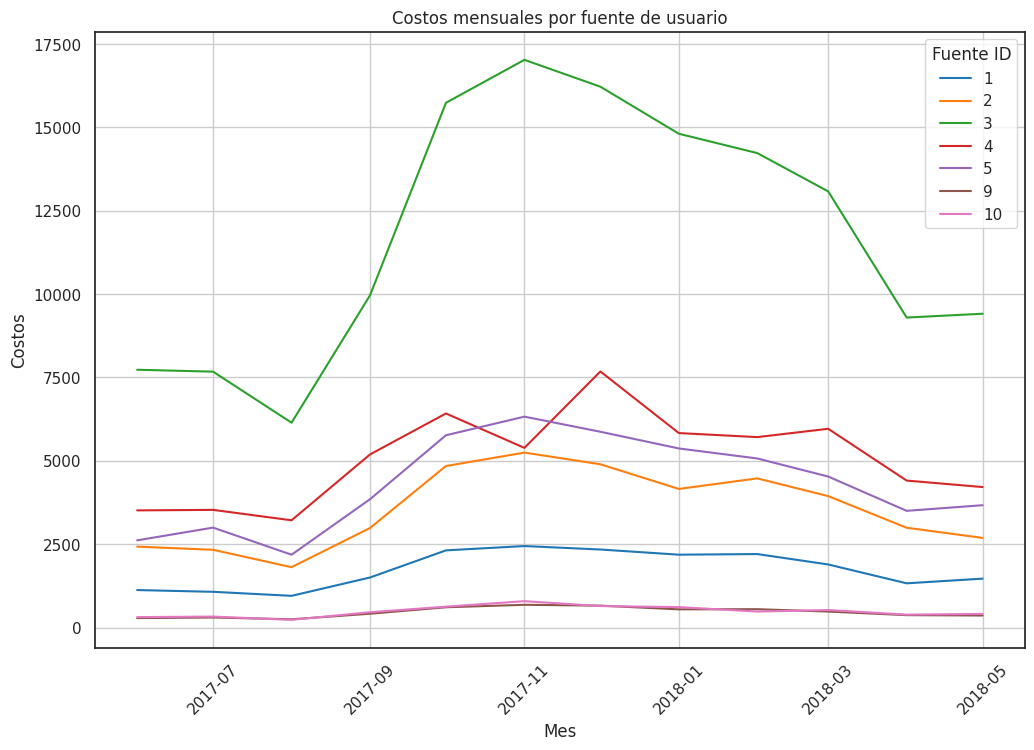

In [49]:
#Creamos un gráfico de líneas para visualizar los costos de cada fuente a través de los meses
plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_costs, x='month', y='costs', hue='source_id', palette='tab10')
plt.title('Costos mensuales por fuente de usuario')
plt.xlabel('Mes')
plt.ylabel('Costos')
plt.xticks(rotation=45)
plt.legend(title='Fuente ID')
plt.grid(True)
plt.show()

**Observaciones** 

* La fuente 3 representa la fuente que más costos ha generado comenzando sus costos en 7,500 y aumenta de manera significativa hasta duplicar este monto en nov 2017 y reduce a partir de este mes hasta llegar al rededor de los 10,000 en marzo 2018.

* Las fuentes 2, 4 y 5 comienzan con una tendencia similar el primer mes (julio 2017) en los 2,500 y que van aumentando gradual mente hasta duplicar sus costos por encima de los 5000 en el mes de (nov 2017) y mantiene estos costos hasta marzo 2018 que podemos ver una ligera baja en los costos.

* Las fuentes 9 y 10 mantienen los costos más bajos durante todo el periodo medido.

#### Customer's Cost of Acquisition

In [50]:
costs_df.head()
#Obtenemos los costos agrupados por mes
costs_df_grouped = costs_df.groupby('month').agg({'costs':'sum'}).reset_index()
costs_df_grouped

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [51]:
report.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


<AxesSubplot:title={'center':'CAC'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

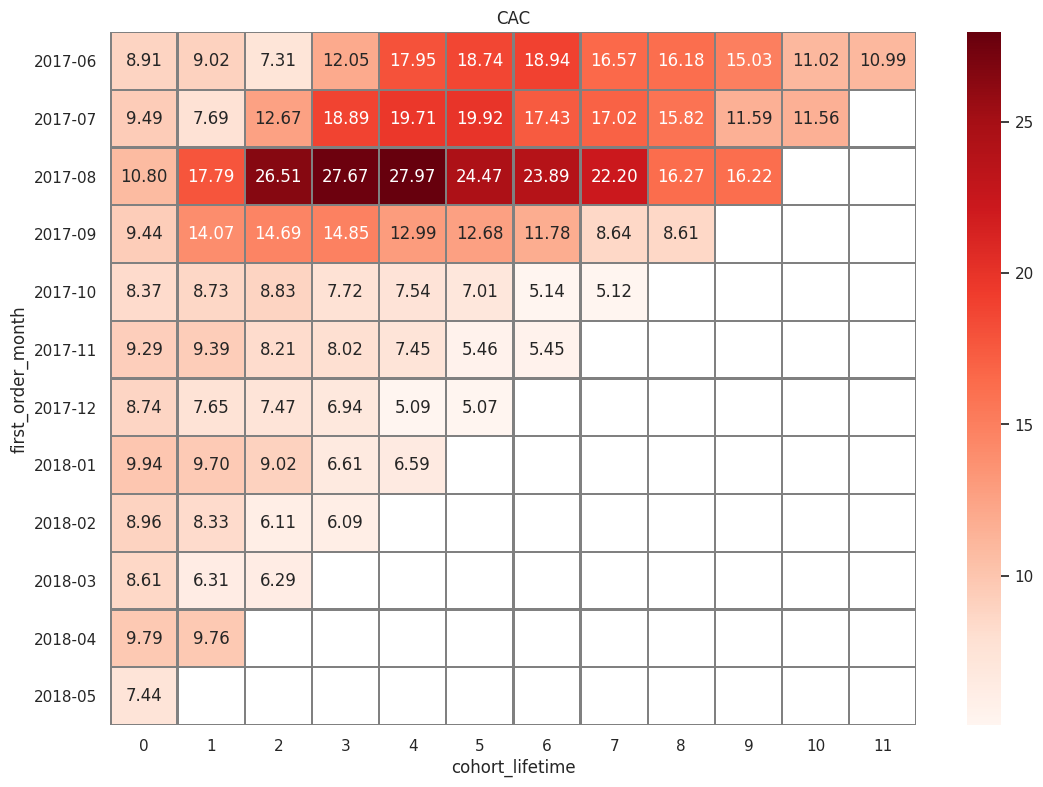

In [52]:
#unimos los dataframes agrupados de los costos acumulados por mes y el reporte de la candidad de compradores y LTV
report_cac = pd.merge(report, costs_df_grouped, right_on='month', left_on ='order_month', how='left')
#report_cac = pd.merge(report, monthly_costs, right_on='month', left_on ='order_month', how='left')

report_cac.head(20)

#Creamos la cohorte para el reporte de costos de adquisición por cliente
report_cac['cohort_lifetime'] = report_cac['order_month'] - report_cac['first_order_month']

report_cac['cohort_lifetime'] = report_cac['cohort_lifetime']/ np.timedelta64(1, 'M')

report_cac['cohort_lifetime'] = report_cac['cohort_lifetime'].round().astype('int')

report_cac['first_order_month'] = report_cac['first_order_month'].dt.strftime('%Y-%m')

report_cac['cac'] = report_cac['costs'] / report_cac['n_buyers']
report_cac.head(20)

#creamos tabla dinámica
output_cac = report_cac.pivot_table(
    index='first_order_month', columns='cohort_lifetime', values='cac', aggfunc='mean'
)

#creamos heatmap para visualizar los resultados
plt.figure(figsize=(13, 9))
plt.title('CAC')
sns.heatmap( 
    output_cac,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
    cmap='Reds'
)

In [53]:
#tomamos una vista previa de nuestro dataframe
report_cac.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv,month,costs,cohort_lifetime,cac
0,2017-06,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,18015.00,0,8.905091
1,2017-06,2023,2017-07-01,981.82,1,0.485329,2017-07-01,18240.59,1,9.016604
2,2017-06,2023,2017-08-01,885.34,2,0.437637,2017-08-01,14790.54,2,7.311191
3,2017-06,2023,2017-09-01,1931.30,3,0.954671,2017-09-01,24368.91,3,12.045927
4,2017-06,2023,2017-10-01,2068.58,4,1.022531,2017-10-01,36322.88,4,17.954958


In [54]:
#creamos un dataframe para calcular los costos totales de adquisición acumulados por 'source_id' 
report_cac_source = pd.merge(report, monthly_costs, right_on='month', left_on ='order_month', how='left')

report_cac_source['cac'] = report_cac_source['costs'] / report_cac_source['n_buyers']

#Sumamos los CAC acumulados por cada 'source_id'
cac_by_source = report_cac_source.groupby('source_id').agg({'cac': 'sum'}).reset_index()

cac_by_source

,source_id,cac
0,1,58.356930
1,2,119.268018
2,3,394.577150
3,4,169.708680
4,5,144.748040
5,9,15.375865
6,10,16.191571


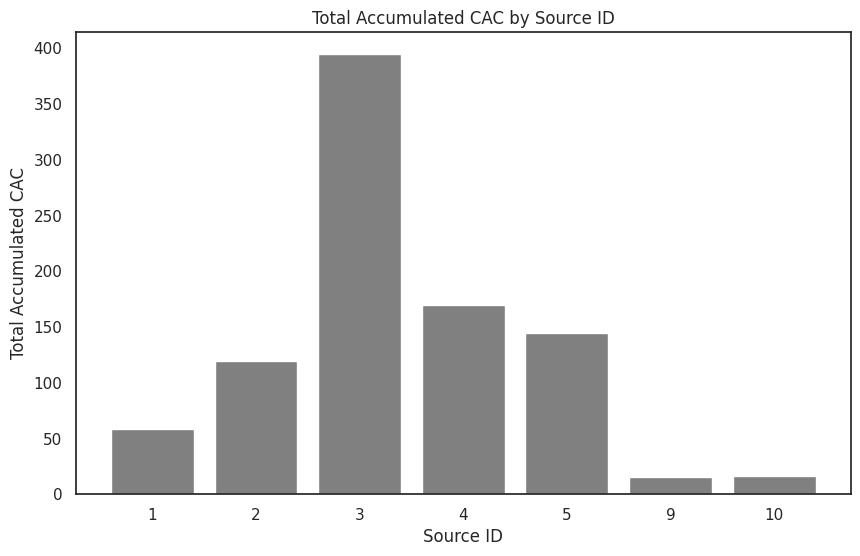

In [55]:
# Visualizamos el CAC acumulado por cada fuente en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(cac_by_source['source_id'].astype(str), cac_by_source['cac'], color='gray')
plt.xlabel('Source ID')
plt.ylabel('Total Accumulated CAC')
plt.title('Total Accumulated CAC by Source ID')
#plt.tight_layout()
plt.show()

**Observaciones**

**Observaciones generales por fuente de adquisición**

* Las "Fuentes ID 9 y 10" son las que tuvieron menor costo de adquisición de clientes.
* La "Fuente ID 3" es la más costosa, lo cual justificaría una revisión detallada de su rendimiento. Si los costos elevados no están justificados por un retorno igualmente alto, podría ser necesario reevaluar la inversión en esta fuente.

**Gráfica de cohortes**

* Tendencia Decreciente: La mayoría de las cohortes muestran una tendencia decreciente en el CAC a medida que envejecen. Esto es común si el CAC inicial incluye gastos de adquisición que no se repiten con el tiempo, como las campañas de lanzamiento o promociones iniciales.
* Variabilidad Inicial: Las cohortes tienden a comenzar con CACs variados, lo que podría estarnos reflejando diferentes estrategias de marketing o condiciones de mercado al momento del lanzamiento de cada cohorte.

**Análisis por cohorte**

* Junio 2017: Esta cohorte comienza con un CAC de 8.91 y experimenta un aumento hasta 18.94 en el sexto mes, luego decrece gradualmente a 10.99 en el undécimo mes. La fluctuación sugiere que hubo gastos adicionales de marketing o cambios en la eficiencia de la adquisición a lo largo del tiempo.

* Julio 2017: Comienza con un CAC más alto de 9.49, alcanza un máximo de 19.92 en el quinto mes, y luego decrece a 11.56, es un comportamiento similar a la cohorte anterior.

#### Return of Marketing Investment (ROMI)

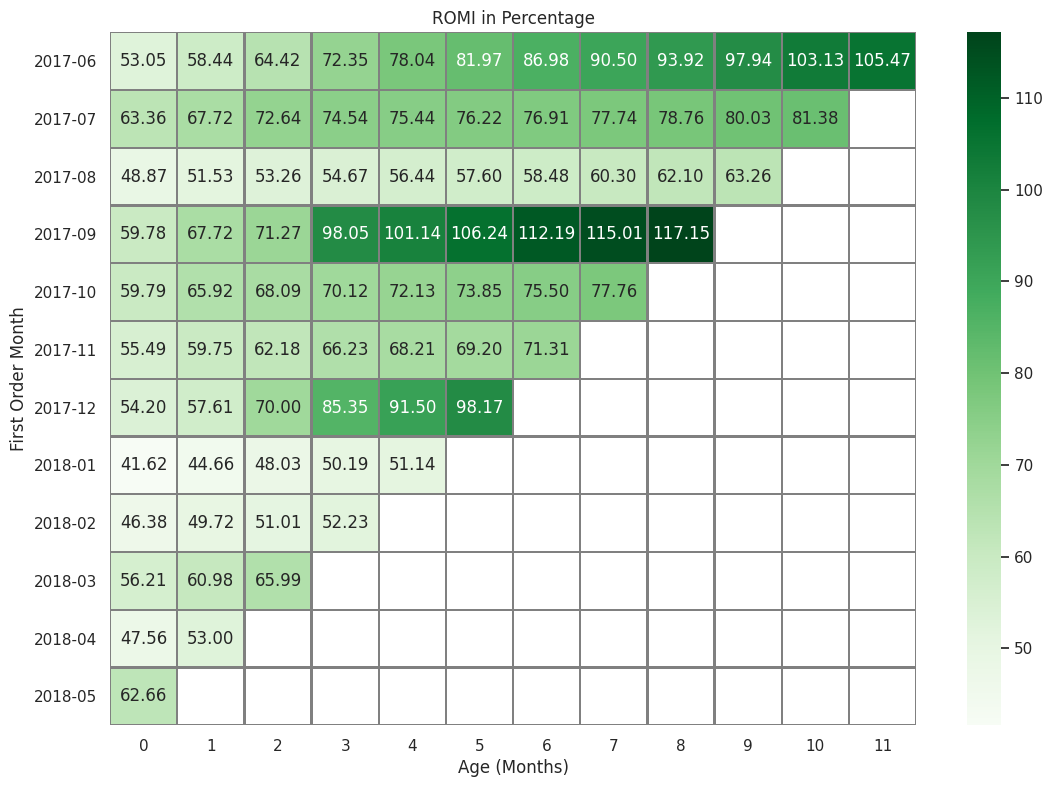

In [56]:
#Calculamos el "ROMI"
report_cac['romi'] = report_cac['ltv'] / report_cac['cac']
output_romi = report_cac.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

# Calcular el ROMI acumulativo y convertirlo a porcentaje
romi_percentage = (output_romi.cumsum(axis=1) * 100).round(2)

#output_romi.cumsum(axis=1).round(2)

plt.figure(figsize=(13, 9))
plt.title('ROMI in Percentage')
sns.heatmap(
    romi_percentage,
    annot=True,  # Muestra las anotaciones dentro de cada celda
    fmt='.2f',  # Formato de los números a dos decimales
    linewidths=1,
    linecolor='gray',
    cmap='Greens'
)

plt.ylabel('First Order Month')
plt.xlabel('Age (Months)')
plt.show()

In [57]:
#Obtenemos un promedio de todas las cohortes para cada mes de ciclo de vida promediando los valores de cada columna
output_romi.cumsum(axis=1).mean(axis=0)

age
0     0.540816
1     0.579125
2     0.626882
3     0.693031
4     0.742558
5     0.804637
6     0.802304
7     0.842621
8     0.879814
9     0.804120
10    0.922548
11    1.054673
dtype: float64

**Observaciones generales ROMI**:


* En la mayoría de las cohortes, el ROMI tiende a aumentar con el tiempo. Esto sugiere que a medida que pasa el tiempo, los ingresos acumulativos generados por los clientes de cada cohorte alcanzan progresivamente los costos iniciales, pero no todas las cohortes han recuperado el costo de inversión.


* Algunas cohortes muestran un crecimiento particularmente fuerte y rápido en su ROMI, destacando su mayor eficacia en la generación de ingresos en comparación con el costo inicial. Por ejemplo, la cohorte de septiembre de 2017 alcanza un ROMI de 117.15% en su undécimo mes, lo cual es excepcional. La estrategia de marketing utilizada en esta cohorte fue la más efectiva, ya que, generó ingresos sustancialmente mayores que los costos incurridos.

Cohortes destacadas:

* La cohorte de junio 2017 se recupera por completo en el 11 mes y logra superar los costos de adquisición de clientes.
* La cohorte de sept 2017 se recupera a partir del 5to mes, ha sido la más rápida de todas en recuperarse.
* La cohorte de dic 2017 en su sexto mes de vida casi se recupera por completo. Es probable que esta cohorte genere más ingresos en meses posteriores.

In [58]:
#creamos un dataframe para calcular los costos totales de adquisición acumulados por 'source_id' 
report_romi_source = pd.merge(report, monthly_costs, right_on='month', left_on ='order_month', how='left')

report_romi_source['cac'] = report_romi_source['costs'] / report_cac_source['n_buyers']

report_romi_source['romi'] = report_romi_source['ltv']/ report_romi_source['cac']

display(report_romi_source.head())

#Sumamos los CAC acumulados por cada 'source_id'
romi_by_source = report_romi_source.groupby('source_id').agg({'romi': 'sum'}).reset_index()

display(romi_by_source)

,first_order_month,n_buyers,order_month,revenue,age,ltv,source_id,month,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1,2017-06-01,1125.61,0.556406,8.490943
1,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2,2017-06-01,2427.38,1.199891,3.937369
2,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,3,2017-06-01,7731.65,3.821873,1.236151
3,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,4,2017-06-01,3514.80,1.737420,2.719213
4,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,5,2017-06-01,2616.12,1.293188,3.653307


,source_id,romi
0,1,142.830515
1,2,69.694169
2,3,21.077514
3,4,48.032245
4,5,57.425354
5,9,539.396756
6,10,514.594482


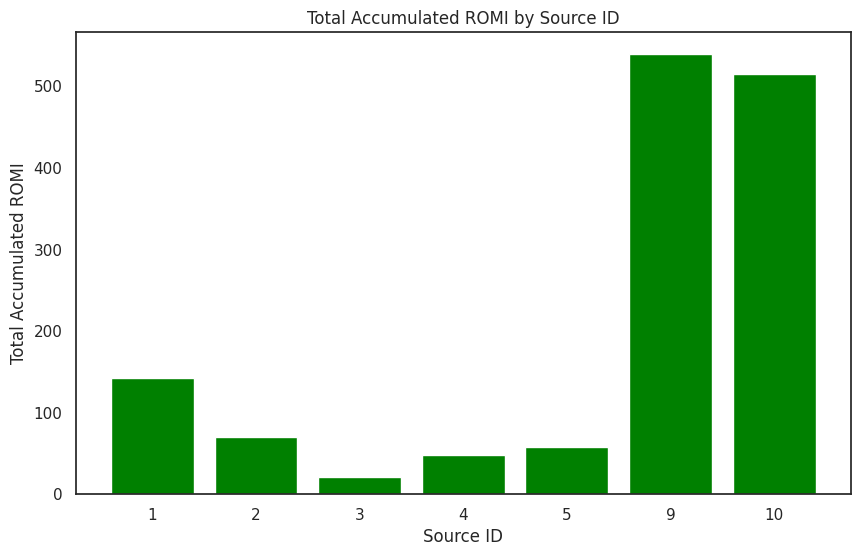

In [59]:
# Visualizamos el CAC acumulado por cada fuente en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(romi_by_source['source_id'].astype(str), romi_by_source['romi'], color='green')
plt.xlabel('Source ID')
plt.ylabel('Total Accumulated ROMI')
plt.title('Total Accumulated ROMI by Source ID')
#plt.tight_layout()
plt.show()

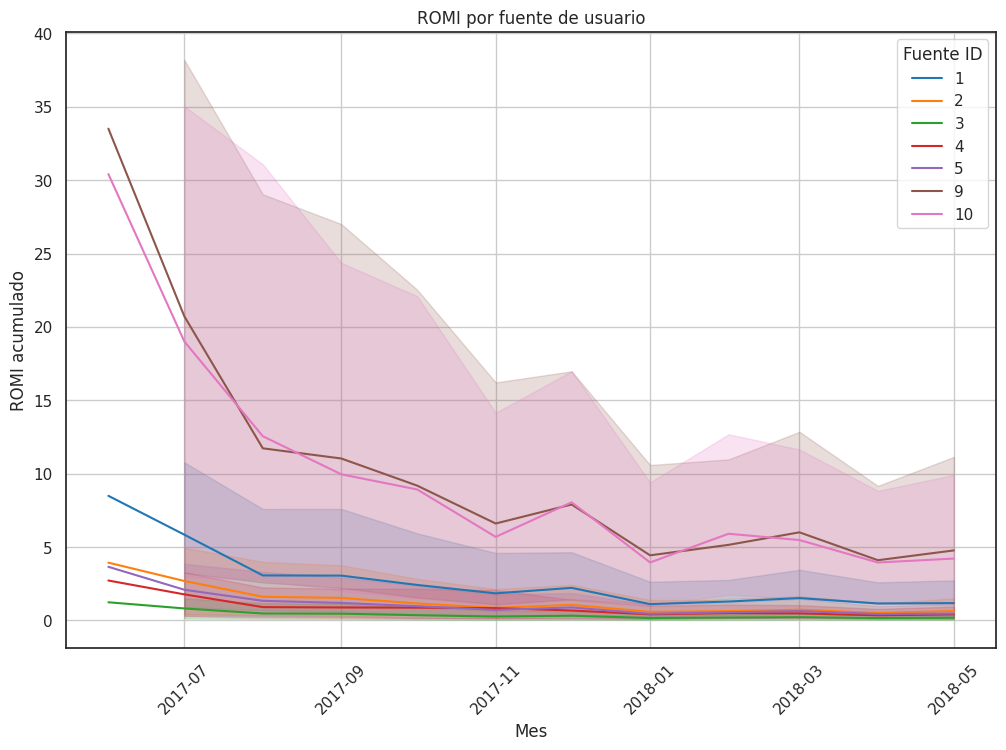

In [60]:
#Creamos un gráfico de líneas para visualizar el ROMI por fuente
plt.figure(figsize=(12, 8))
sns.lineplot(data=report_romi_source, x='month', y='romi', hue='source_id', palette='tab10')
plt.title('ROMI por fuente de usuario')
plt.xlabel('Mes')
plt.ylabel('ROMI acumulado')
plt.xticks(rotation=45)
plt.legend(title='Fuente ID')
plt.grid(True)
plt.show()

**Observaciones**:

* Las fuentes ID 9 y 10 obtienen un rendimiento muy por encima de las demás fuentes, reducen sustancialmente en agosto 2017 y se mantienen constistentes, reducen en noviembre 2017 y en diciembre 2017 tienen un pico importante, podría deberse a estacionalidad. Después de diciembre reducen hasta su punto más bajo y se recuperan gradualmente en febrero 2018.

* Las fuentes ID 9 y 10 tienen un rendimiento destacado y muy similar, tiene variaciones donde el rendimiento aumenta como en en diciembre del 2017, en cuanto a el año 2018, crece de manera importante en los primeros meses del 2018. Se sugiere analizar que estrategias fueron implementadas en estas dos fuentes ya que dieron grandes rendimientos en las inversiones. 

* En cuanto a la fuente ID 3, a pesar de ser la más costosa como podemos observar en la gráfica anterior, esta fue la que menos rendimientos generó.

* Las fuentes como la 1, 4 y 5, no tuvieron rendimientos destacables como la 9 y 10 pero obtuvieron un rendimiento constante durante todo el periodo, lo que podría ayudar a implementar una estrategia segura si se estudia.

## Conclusión


Tomando en cuenta la información proporcionada a lo largo del análisis, mi recomendación a los expertos de marketing se basaría en maximizar el Valor de Vida del Cliente (LTV) y optimizar el Retorno sobre la Inversión en Marketing (ROMI), y realizar ajustes en las fuentes de Adquisición de Clientes (CAC). 

Inversión basada en LTV:

* Cohortes con alto LTV: La cohorte de septiembre de 2017 demostró un LTV excepcionalmente alto, especialmente en su 4to mes. Se sugiere identificar la fuente o la plataforma que atrajo a estos usuarios y comprender las campañas o acciones que se realizaron en ese momento es clave.
* LTV en el tiempo: Las cohortes antiguas muestran un LTV acumulado superior, lo que resalta la importancia de las estrategias de retención a largo plazo y justifica inversiones en programas de lealtad y re-engagement.

Evaluación basada en ROMI:

* Canales de alto ROMI: Según el análisis, las fuentes o plataformas que mostraron los ROMI más altos fueron las Fuentes ID 9 y 10. Estos canales parecen ser eficientes en términos de retorno y deberían seguir siendo estudiados por el área de marketing.

* Canales de bajo ROMI: Por otro lado, la Fuente ID 3, a pesar de ser la más costosa, presentó el ROMI más bajo. Esto indica que se debe evaluar cuidadosamente la eficacia de las inversiones en este canal y considerar la reducción o la reasignación del presupuesto.

Enfoque en el CAC:

* Optimización de gastos: El análisis sugiere la necesidad de monitorear y optimizar los gastos en marketing, especialmente en los primeros meses de cada cohorte, donde el CAC tiende a ser más alto.
* Evaluación de estrategias: La comparación entre cohortes puede ayudar a identificar cuáles estrategias de marketing han sido más eficientes y podrían replicarse o ajustarse para cohortes futuras.
* Retención y valor a largo plazo: Dado que el CAC disminuye con el tiempo, es crucial enfocarse en estrategias de retención que maximicen el valor a largo plazo de los clientes, compensando así los altos costos iniciales de adquisición.


En resumen se sugiere:

* Reinversión de las fuentes de alto rendimiento: Las fuentes ID obtuvieron excelentes resultados, por lo que se sugiere una reinversión de estos canales. Sin embargo, es importante estudiar que no hayan sido eventos aislados y que su reinversión sea sostenible alargo plazo. 
* Optimización de Estrategias de Retención: Las estrategias que aumentan el LTV, como programas de lealtad y campañas de re-engagement, deben priorizarse, en especial para aquellas cohortes que han mostrado una buena retención en el pasado.
* Aprovechar picos importantes: Las cohortes de septiembre de 2017 presentaron un promedio de compra más alto y una tasa de conversión exitoso. Es importante análizar que sucedió en aquella temporada para replicar el éxito.